In [10]:
# import Data "test.csv" 

In [143]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [145]:
import matplotlib.pyplot as plt #for graphying

In [146]:
from pylab import*

In [147]:
%matplotlib inline

In [148]:
import seaborn as sns #to make matplotlib graphics looking better

In [183]:
#test = pd.read_csv('test.csv', index_col=['ID'])
test = pd.read_csv('test.csv')
#print(test)

In [184]:
len(test.columns)

132

In [137]:
df.dtypes

v1      float64
v2      float64
v3       object
v4      float64
v5      float64
v6      float64
v7      float64
v8      float64
v9      float64
v10     float64
v11     float64
v12     float64
v13     float64
v14     float64
v15     float64
v16     float64
v17     float64
v18     float64
v19     float64
v20     float64
v21     float64
v22      object
v23     float64
v24      object
v25     float64
v26     float64
v27     float64
v28     float64
v29     float64
v30      object
         ...   
v102    float64
v103    float64
v104    float64
v105    float64
v106    float64
v107     object
v108    float64
v109    float64
v110     object
v111    float64
v112     object
v113     object
v114    float64
v115    float64
v116    float64
v117    float64
v118    float64
v119    float64
v120    float64
v121    float64
v122    float64
v123    float64
v124    float64
v125     object
v126    float64
v127    float64
v128    float64
v129      int64
v130    float64
v131    float64
dtype: object

In [139]:
#There are 132 variables and I am going to just work on selective variables
test1= test[['v10', 'v12', 'v21','v24']]
print(len(test1))
test1.head(2)

114393


,v10,v12,v21,v24
0,1.312911,6.961173,7.437806,E
1,1.291029,6.618289,5.895192,D


In [140]:
pd.unique(test.v24.ravel()) #checking categories of v24

array(['E', 'D', 'B', 'C', 'A'], dtype=object)

In [142]:
#save new DataFrame
test1.to_pickle('BNP-test 4variables.pkl')

In [149]:
test=pd.read_pickle('BNP-test 4variables.pkl')
print (len(test))
test.head(2)

114393


,v10,v12,v21,v24
0,1.312911,6.961173,7.437806,E
1,1.291029,6.618289,5.895192,D


In [153]:
def f(x):
    return Series (dict(population_category_v24=x['v24'].count()))

In [154]:
category_count=test.groupby('v24').apply(f)
category_count

,population_category_v24
v24,
A,3803
B,8168
C,20887
D,26356
E,55179


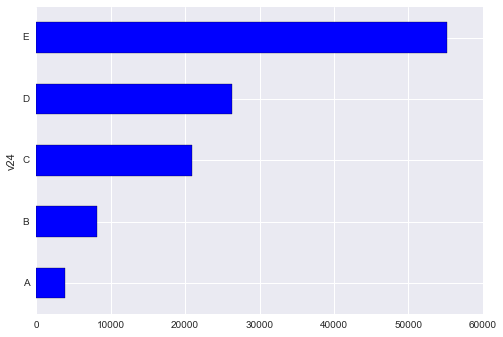

In [159]:
category_count['population_category_v24'].plot(kind='barh')

In [72]:
# dealing with missing data values

In [163]:
testMean=test.fillna(test.mean()) #this will change the variance
#print(testMean)
testMean.shape# shows the size of the data
#ordering=pd.DataFrame(testMean)

(114393, 4)

In [166]:
testMean=testMean.sort_values(by='v24')

In [216]:
print(testMean['v10'].corr(testMean['v12']) )
print(test['v10'].corr(test['v12'])) 
#very strong positive correlation for original data
#and motified one

0.912739707677
0.912763318482


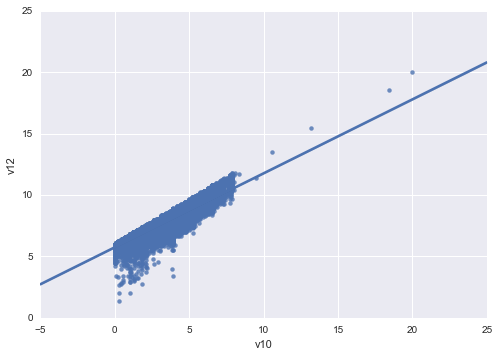

In [217]:
sns.regplot(x="v10", y="v12", data=testMean)

In [213]:
testMean['v10'].corr(testMean['v21']) 
# weak positive correlation

0.32271287686888156

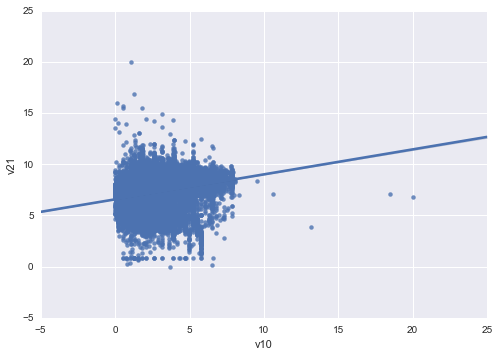

In [218]:
sns.regplot(x="v10", y="v21", data=testMean)

In [214]:
testMean['v12'].corr(testMean['v21']) 
#relatively weak positive correlation

0.3071799414748459

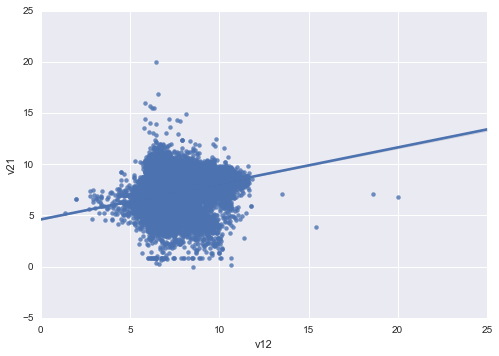

In [219]:
sns.regplot(x="v12", y="v21", data=testMean)

In [177]:
testMeanA=testMean[:3803]

In [195]:
testMeanA.describe() 

,v10,v12,v21
count,3.803000e+03,3803.000000,3803.000000
mean,1.968808e+00,6.932390,7.024727
std,1.463067e+00,0.948378,1.072180
min,-8.803545e-07,3.371788,0.405514
25%,1.050328e+00,6.347884,6.416824
50%,1.312911e+00,6.642278,7.031747
75%,2.341357e+00,7.117794,7.662711
max,1.059081e+01,13.486494,12.356923


In [197]:
endD=len(testMeanA)+8168
print(endB) 

11971


In [196]:
endC=endB+20887
print(endC) 

32858


In [198]:
endD=endC+26356
print(endD) 

59214


In [200]:
endE=endD+55179
print(endE) 
len(testMean)

114393


114393

In [204]:
testMeanB=testMean[3803:endB]
#testMeanB

In [191]:
testMean[11970:11972]

,v10,v12,v21,v24
34463,0.962802,6.314942,5.914367,B
103752,0.765864,6.139691,6.791003,C


In [193]:
testMeanB.describe() 

,v10,v12,v21
count,8.167000e+03,8167.000000,8167.000000
mean,2.134853e+00,6.992834,7.104845
std,1.553279e+00,0.980209,1.105375
min,-9.086954e-07,2.745050,1.673968
25%,1.050329e+00,6.352678,6.436049
50%,1.531730e+00,6.676559,7.075774
75%,2.625820e+00,7.254981,7.783338
max,7.877462e+00,11.176043,20.000001


In [208]:
testMeanC=testMean[endB:endC]
testMeanC.describe() 
#testMeanC

,v10,v12,v21
count,2.088700e+04,20887.000000,20887.000000
mean,2.156968e+00,6.965066,7.106595
std,1.580415e+00,0.966190,1.104474
min,-6.358644e-07,1.348855,1.330187
25%,1.050329e+00,6.346372,6.435533
50%,1.553610e+00,6.666560,7.066539
75%,2.625820e+00,7.201304,7.792470
max,9.518600e+00,11.687400,15.518160


In [209]:
testMeanD=testMean[endC:endD]
testMeanD.describe() 
#testMeanD

,v10,v12,v21
count,2.635600e+04,26356.000000,26356.000000
mean,2.024295e+00,6.969165,7.092663
std,1.485124e+00,0.985155,1.068201
min,-9.669047e-07,3.180898,0.647539
25%,1.050329e+00,6.342909,6.467897
50%,1.312911e+00,6.665210,7.087603
75%,2.407003e+00,7.194936,7.737809
max,2.000000e+01,20.000000,15.976850


In [210]:
testMeanE=testMean[endD:endE]
testMeanE.describe() 
#testMeanE

,v10,v12,v21
count,5.517900e+04,55179.000000,5.517900e+04
mean,1.667379e+00,6.783974,6.978181e+00
std,1.204083e+00,0.850997,1.020949e+00
min,-8.909169e-07,2.699405,6.048887e-08
25%,1.050328e+00,6.300766,6.398489e+00
50%,1.291029e+00,6.564796,7.035117e+00
75%,1.816193e+00,6.876467,7.603888e+00
max,1.844639e+01,18.582915,1.691629e+01


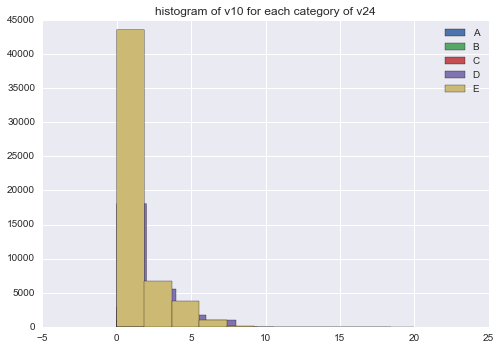

In [231]:
bins=np.linspace(-10,10,100)
plt.title('histogram of v10 for each category of v24')
plt.hist("v10", label='A', data=testMeanA)
plt.hist("v10", label='B', data=testMeanB)
plt.hist("v10", label='C', data=testMeanC)
plt.hist("v10", label='D', data=testMeanD)
plt.hist("v10", label='E', data=testMeanE)
plt.legend(loc='upper right')
plt.show()
#from the histogram, it is hard to say that the category of v24 
#is related to v10 and so as v12 as they are strongly correlated

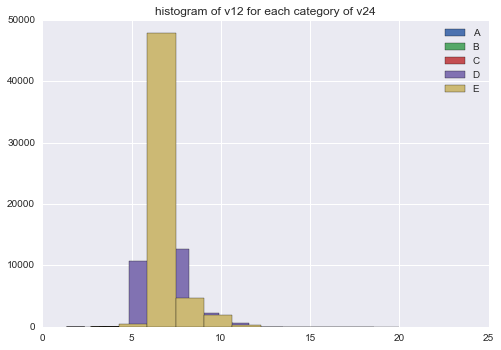

In [232]:
bins=np.linspace(-10,10,100)
plt.title('histogram of v12 for each category of v24')
plt.hist("v12", label='A', data=testMeanA)
plt.hist("v12", label='B', data=testMeanB)
plt.hist("v12", label='C', data=testMeanC)
plt.hist("v12", label='D', data=testMeanD)
plt.hist("v12", label='E', data=testMeanE)
plt.legend(loc='upper right')
plt.show()
#As we expected from above..

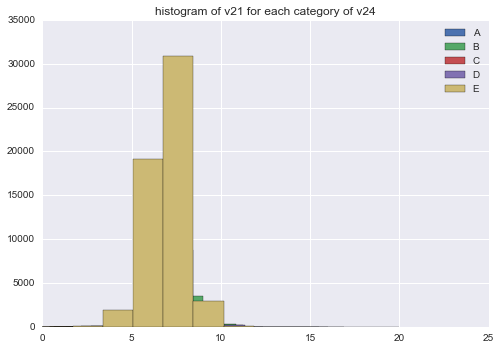

In [233]:
bins=np.linspace(-10,10,100)
plt.title('histogram of v21 for each category of v24')
plt.hist("v21", label='A', data=testMeanA)
plt.hist("v21", label='B', data=testMeanB)
plt.hist("v21", label='C', data=testMeanC)
plt.hist("v21", label='D', data=testMeanD)
plt.hist("v21", label='E', data=testMeanE)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Therefore we can see that the v24 is not differed 
#by the other three variables; v10,v12,v21
#We can further investigates about the relationship among 
#other variables that we have not consider